<a href="https://colab.research.google.com/github/Meridor6919/BeeClassification/blob/master/BeeClassificationPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="0"></a>
# Projekt klasyfikacji pszczół
-------------------
Celem projektu jest przedstawienie problemu wielowymiarowej klasyfikacji obrazu w której krok po kroku przeprowadzamy czytelnika przez zagadnienia z zakresu konwolucyjnych sieci neuronowych. (dalej CNN)

Interaktywna forma notatnika pozwala na dużo lepsze zrozumienie omawianych zagadnień. Dobór rozważanego przykładu również nie jest przypadkowy. Zaproponowane podejście może zostać zaimplementowane do dużo szerszej klasy problemów. Niniejszy dokument może, więc stanowić istotną pomoc w ich rozwiązywaniu.

## Spis treści
0. [Wprowadzenie](#0)
1. [Wstęp teoretyczny](#1)
    1. [Podstawowe pojęcia](#1.1)
    2. [Czym jest CNN?](#1.2)
    3. [Struktura sieci](#1.3)
2. [Przykład klasyfikacji pszczół](#2)
    1. [Zbiór danych](#2.1)
    2. [Obróbka danych](#2.2)
    3. [Metryki dla wielowymiarowych danych](#2.3)
    4. [Model](#3.1)
    5. [Problem nadmiernego dopasowania](#3.2)
    6. [Model z jednym kanałem](#3.3)
4. [Kontrybutorzy](#4)
5. [Źródła](#5)


<a name="1"></a>
## Wstęp teoretyczny
-------------------

Aby odpowiedzieć na pytanie, czym jest **Konwolucyjna Sieć Neuronowa** (ang. Convolutional Neural Network, inaczej CNN), pierw musimy przybliżyć pojęcie sztucznej sieci neuronowej.<br/>
Sieci neuronowe są w ogólności modelem obliczeniowym inspirowanym strukturą i funkcją ludzkiego mózgu. Składają się z dużej liczby prostych jednostek przetwarzających, zwanych sztucznymi neuronami, które są zorganizowane w warstwy i połączone ze sobą za pomocą wag i odchyleń, by jak najlepiej rozpoznać podstawowe relacje w zbiorze danych.

<a name="1.1"></a>
### Podstawowe pojęcia
------------------------

Rozłóżmy sieć neuronową na jej podstawowe bloki konstrukcyjne:
1. **Tensor** jest uogólnieniem macierzy na dowolną liczbę wymiarów. Są one używane do reprezentowania danych w sieci neuronowej - prawie zawsze są to dane liczbowe.

![tensor](https://drive.google.com/uc?id=1ZvNacNdu_RG0jr5U2PrwVoQsRg07Jzjb)

2. **Neuron** można przedstawić jako funkcję, która przyjmuje wiele wejść i daje jedno wyjście.

![sztuczny neuron](https://drive.google.com/uc?id=1k3OCAmfXWrhs_lv-ER75e0I9OOaUqaDQ)

3. **Warstwa** to zbiór neuronów o tym samym działaniu, z tymi samymi hiperparametrami.

4. **Wagi filtra** (inaczej wagi jądra lub maski), choć unikalne dla każdego neuronu, są dostrajane w fazie treningu w celu optymalizacji wydajności sieci na danym zadaniu.

5. **Odchylenie** (ang. bias) jest skalarem, który pozwala budować model liniowy, który nie jest ustalony na początku i ma możliwość przeszukiwania przestrzeni rozwiązań. Odchylenie jest uczone wraz z wagami filtra.

![sztuczny neuron](https://drive.google.com/uc?id=1_XR0_czVA84L2-GpoVlHluIfKWvuYN_9)

6. **Funkcje aktywacyjne** (ang. Activation Functions) - nakładane elementarnie na dane wejściowe po nałożeniu wag. Wprowadzają one nieliniowość do sieci, pozwalając modelowi na uczenie się bardziej złożonych funkcji. Niektóre z najbardziej popularnych funkcji aktywacji obejmują:

![sztuczny neuron](https://drive.google.com/uc?id=1E23OOrObsAkbnJ27MG_pRQnDNZnB2sA6)

<a name="1.2"></a>
### Czym jest CNN?
-------------------




**Czym różni się CNN od klasycznego modelu uczenia maszynowego?**

CNN wykorzystuje specjalny typ warstwy - warstwę konwolucyjną, która jest dobrze przygotowana do uczenia się z obrazów i danych obrazopodobnych. Sieć taka może być wykorzystana do zadań związanych z widzeniem komputerowym, takich jak przetwarzanie obrazów, klasyfikacja, segmentacja i wykrywanie obiektów.<br/><br/>

![warstwa konwolucyjna](https://drive.google.com/uc?id=1-qrBQ0ynVIu5X8Nr9ZaQmtFX_OKJeD6j)

<a name="1.3"></a>
### Struktura sieci
-------------------

**Warstwa wejściowa** (ang. Input Layer) - pierwsza warstwa sieci, ma za zadanie przechwycenie sygnału i przekazanie go do kolejnych warstw sieci (zwanych warstwami ukrytymi).

**Warstwa konwolucyjna** (ang. Convolutional Layer) - stosuje filtry do danych wejściowych i uczy się rozpoznawania cech. Początkowe warstwy konwolucyjne wydobywają ogólne lub niskopoziomowe cechy, takie jak linie i krawędzie, a kolejne warstwy uczą się subtelniejszych szczegółów lub cech wysokopoziomowych. 

**Warstwa łącząca** (ang. Pooling Layer) - jest używana do zmniejszania rozmiaru objętości wejściowej, aby zmniejszyć moc obliczeniową wymaganą do przetworzenia obrazu, nie tracąc przy tym właściwości obrazu.

**Warstwa dropout** (ang. Dropout Layer) - losowo wyrzuca pewne neurony podczas treningu by zapobiec nadmiernemu dopasowaniu.

**Warstwa w pełni połączona** (ang. Fully Connected Layer albo Dense Layer) pobiera wyjście z końcowej warstwy łączącej i wykorzystują je do tworzenia predykcji przy użyciu standardowych technik sieci neuronowych. Jest zazwyczaj ostatnią warstwą przed warstwą wyjściową.

**Funkcja straty** (ang. Loss Function) - pobiera ostateczne wyjście sieci, wytworzone przez warstwę w pełni połączoną, i porównuje je z prawdziwą etykietą danego elementu. Na tej podstawie obliczany jest błąd, wykorzystywany do aktualizacji wag i odchyleń.

**Warstwa wyjściowa** (ang. Output Layer) - ostatnia warstw sieci, w której neuronach formowane są sygnały wyjściowe.<br/><br/>

<a name="2"></a>
## Przykład klasyfikacji pszczół
-------------------

Metody klasyfikacji danych, które pokazujemy nie są specyficzne dla danego framework'a. Zdecydowaliśmy się na użycie Tensorflow Keras, natomiast zawarta wiedza może być globalnie zaaplikowana do podobnych problemów przy pomocy różnych bibliotek przeznaczonych do uczenia maszynowego. 

Numpy to standardowa biblioteka przeznaczona do operacji matematycznych.

Matplotlib posłuży nam do rysowania wszelkiego rodzaju wykresów.

In [1]:
import keras
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import layers
from tensorflow.keras import datasets, layers, models, losses

import numpy as np

import matplotlib.pyplot as plt

<a name="2.1"></a>
### Zbiór danych
-------------------

In [2]:
dataset = tfds.load('bee_dataset', split=['train'], as_supervised=True)

[Bee_dataset](https://www.tensorflow.org/datasets/catalog/bee_dataset) 
jest zbiorem obrazów oraz odpowiadających im etykiet stworzonym do uczenia algorytmu klasyfikacji obrazów do czterech odrębnych kategorii:
  * czy pszczoła jest zainfekowana dręczem pszczelim
  * czy  pszczoła przenosi pyłek
  * czy jest to osa
  * czy pszczoła chłodzi ul machając skrzydłami

Ważnym krokiem jest podzielenie bazy danych na trzy odrębne zbiory.
  * Treningowy - zestaw zdjęć na którym nasza sieć będzie się uczyć
  * Walidacyjny - pozwala na dopasowanie hiperparametrów. Pomaga także uniknąć problemu nadmiernego dopasowywania
  * Testowy - potrzebny do wskazania jak dobrze nasza sieć nauczyła się klasyfikować poszczególne parametry.

In [3]:
def getDataset(ranges, idx):
    return (
        np.array(list(map(lambda x: x[0][:, :, :], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['varroa_output'], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['pollen_output'], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['wasps_output'], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['cooling_output'], array[ranges[idx]: ranges[idx + 1]])))
    )

splitSize = (0.0, 0.765, 0.9, 1.0)
array = np.vstack(tfds.as_numpy(dataset[0]))
ranges = list([int(array.shape[0] * x) for x in splitSize])

train_images, l1, l2, l3, l4 = getDataset(ranges, 0)
train_labels = np.dstack((l1, l2, l3, l4)).squeeze()

validation_images, l5, l6, l7, l8 = getDataset(ranges, 1)
validation_labels = np.dstack((l5, l6, l7, l8)).squeeze()

test_images, l9, l10, l11, l12 = getDataset(ranges, 2)
test_labels = np.dstack((l9, l10, l11, l12)).squeeze()


<ipython-input-3-5c5efe2c3081>:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  array = np.vstack(tfds.as_numpy(dataset[0]))
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Zobaczmy teraz rozmiar poszczególnych zbiorów.
Proporcje możemy zmienić podając inne wartości do zmiennej *spitSize*

In [4]:
print("Database size: {}".format(array.shape[0]))
print("Training set size: {}".format(ranges[1] - ranges[0]))
print("Validation set size: {}".format(ranges[2] - ranges[1]))
print("Test set size: {}".format(ranges[3] - ranges[2]))

Database size: 7490
Training set size: 5729
Validation set size: 1012
Test set size: 749


Zobaczmy jak duże są nasze zdjęcia. Pierwsze dwie współrzędne to kolejno szerokość i wysokość. Trzecia to ilość kanałów koloru.

In [5]:
train_images[0].shape

(300, 150, 3)

A tak prezentują się przedstawiciele poszczególnych klas

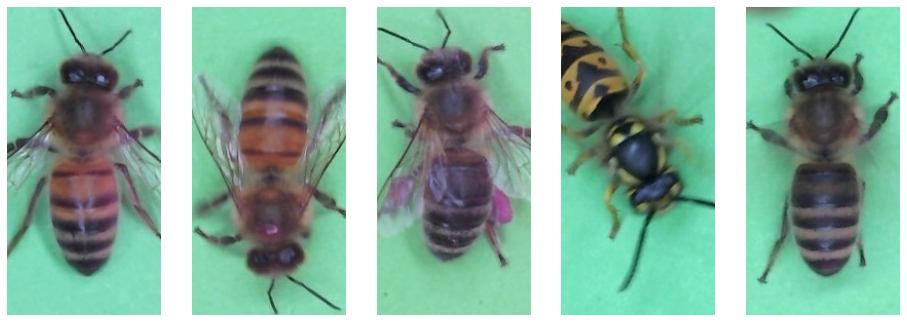

In [6]:
def showRepresentants(images):
  fig, (drone, varoa_mite, pollen, wasp, cooling) = plt.subplots(1, 5, figsize=(16, 16))
  drone.axis('off')
  drone.imshow(images[np.where((test_labels == (0, 0, 0, 0)).all(axis=1))[0][0]])
  varoa_mite.axis('off')
  varoa_mite.imshow(images[np.where((test_labels == (1, 0, 0, 0)).all(axis=1))[0][0]])
  pollen.axis('off')
  pollen.imshow(images[np.where((test_labels == (0, 1, 0, 0)).all(axis=1))[0][0]])
  wasp.axis('off')
  wasp.imshow(images[np.where((test_labels == (0, 0, 1, 0)).all(axis=1))[0][0]])
  cooling.axis('off')
  cooling.imshow(images[np.where((test_labels == (0, 0, 0, 1)).all(axis=1))[0][0]])

showRepresentants(test_images)

W bazie danych można również zaobserwować niepoprawne obrazy oraz obrazy spełniające więcej niżeli jedną kategorię (w tym przypadku ma to być pszczoła chłodząca ul oraz przenosząca pyłek):

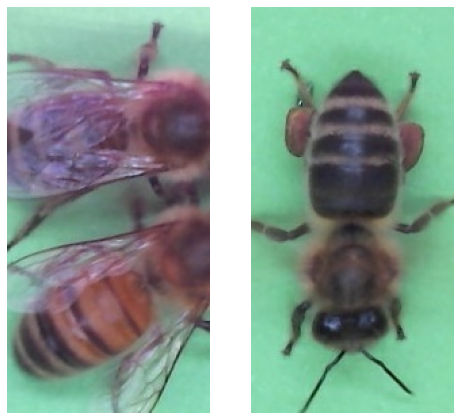

In [7]:
fig, (bad, double) = plt.subplots(1, 2, figsize=(8, 16))
bad.axis('off')
bad.imshow(test_images[144])
double.axis('off')
double.imshow(test_images[223])

<a name="2.2"></a>
### Obróbka danych
-------------------

**Czym jest przetwarzanie danych?**
...

Zaliczają się do nich:<br/>
  **Normalizacja** (ang. Normalization) - najważniejszy krok w części wstępnego przetwarzania. Polega ona na przeskalowaniu wartości pikseli tak, aby mieściły się one w określonym zakresie(najczęściej 0-1). Umożliwia wyższe prędkości uczenia się i zmniejszenie silnej zależności od inicjalizacji.
  Zastosowaliśmy ją w pierwszej warstwie modelu (patrz ``` rescaling ```)

  **Standaryzacja** (ang. Standardization) - przekształcenia danych w taki sposób, aby średnia danych była równa 0, a odchylenie standardowe 1. W naszym przypadku ta operacja nie jest wymagana.

  **Kodowanie etykiety** (ang. Label Encoding) - reprezentowania zmiennych kategorycznych jako wektor wartości o wartości 0 lub 1. Zaaplikowaliśmy tą technikę w momencie ładowania informacji z bazy danych.

  **Przekształcenia morfologiczne obrazów** (ang. Morphological Image Transformations) - modyfikacje obejmujące kształt i formę obrazów. Zaliczają się do nich:
  * Zmniejszenie ilości warstw kanałów koloru
  * Tworzenie obrazu binarnego, czyli całkowite spłaszczenie wektora koloru
  * Erozja (kurczenie jasnych regionów i powiększanie ciemnych)
  * Dylatacja (kurczenie ciemnych regionów i powiększanie jasnych)
  * Otwarcie (dylatacja poprzedzona erozją, proces usuwa małe jasne plamy tzw. sól)
  * Zamknięcie (erozja poprzedzona dylatacją, proces usuwa małe czarne plamy tzw. pieprz)

  My wypróbujemy pierwszy podpunkt, sprawdzając skuteczność uczenia na pojedynczym kanale koloru. Zobaczymy tym samym czy istotne w rozpoznawaniu wybranych parametrów jest kolor pszczoły.

**Rozszerzenie danych** (ang. Data Augmentation) - zestaw technik, które sztucznie generują nowe dane z istniejących danych. Zaliczają się do nich: obrót, rotacja, losowe wycinki, zmiana koloru, dodanie szumu, utrata informacji, zmiana kontrastu. Nasz model również korzysta i z tej techniki.<br/><br/>

<a name="2.3"></a>
### Metryki dla wielowymiarowej klasyfikacji 
-------------------

Żeby odzyskać informacje jak nasz model uczy się na poszczególnych parametrach musimy zdefiniować odpowiednie metryki. Dla każdego z parametrów utworzyliśmy funkcje zwracającą stratę względem binary cross entropy loss z parametrem 0.9.
Użycie tej konkretnej funkcji straty zamiast sparse categorical cross entropy skutkuje wzrostem w jakości klasyfikacji o ponad 30 punktów procentowych.

In [8]:
class my_metric:
  loss="binary_crossentropy"
  loss_func = tf.keras.metrics.BinaryAccuracy(threshold=0.9)

  #loss="sparse_categorical_crossentropy"
  #loss_func = tf.keras.metrics.SparseCategoricalCrossentropy()

  def all(y_true, y_pred):
    my_metric.loss_func.reset_state()
    my_metric.loss_func.update_state(y_true, y_pred)
    return my_metric.loss_func.result()

  def varroa(y_true, y_pred):
    my_metric.loss_func.reset_state()
    my_metric.loss_func.update_state(y_true[:, 0], y_pred[:, 0])
    return my_metric.loss_func.result()

  def pollen(y_true, y_pred):
    my_metric.loss_func.reset_state()
    my_metric.loss_func.update_state(y_true[:, 1], y_pred[:, 1])
    return my_metric.loss_func.result()

  def wasps(y_true, y_pred):
    my_metric.loss_func.reset_state()
    my_metric.loss_func.update_state(y_true[:, 2], y_pred[:, 2])
    return my_metric.loss_func.result()

  def cooling(y_true, y_pred):
    my_metric.loss_func.reset_state()
    my_metric.loss_func.update_state(y_true[:, 3], y_pred[:, 3])
    return my_metric.loss_func.result()

<a name="3.1"></a>
### Model
-------------------

Model jest bardzo prosty. Składa się z czterech warstw konwolucyjnych z funkcją aktywacji ReLU rozdzielonych dwoma warstwami łączącymi. Następnie rozpłaszczamy wektory, stosujemy dropout i dostawiamy jedną warstwę pełną z sigmoidą.

Optymizator to ADAM czyli ulepszona wersja gradientu stochastycznego z momentum.

![layers](https://drive.google.com/uc?id=1H5YY8okmA36AcKFIIDX5P6P2jneaeAym)

Definicja modelu w tensorflow keras jest bardzo prosta. Najpierw załączamy nasze przekształcenia dotyczące rozszerzania danych, a następnie implementujemy podaną wyżej architekturę.

In [9]:
inputs = tf.keras.Input(shape=(300, 150, 3))
#Data augmentation
layer = layers.Rescaling(1./255.)(inputs)
layer = layers.RandomFlip("horizontal")(layer)
layer = layers.RandomRotation(0.1)(layer)
layer = layers.RandomZoom(0.2)(layer)

#Model architecture
layer = layers.Conv2D(filters=10, kernel_size=3, activation="relu")(layer)
layer = layers.Conv2D(filters=10, kernel_size=3, activation="relu")(layer)

layer = layers.MaxPooling2D(pool_size=2)(layer)

layer = layers.Conv2D(filters=10, kernel_size=3, activation="relu")(layer)
layer = layers.Conv2D(filters=10, kernel_size=3, activation="relu")(layer)

layer = layers.MaxPooling2D(pool_size=2)(layer)

layer = layers.Flatten()(layer)

layer = layers.Dropout(0.2)(layer)
outputs = layers.Dense(4, activation="sigmoid")(layer)
model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(loss=my_metric.loss,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[my_metric.all, my_metric.varroa, my_metric.pollen, my_metric.wasps, my_metric.cooling,])

Tak wygląda to wewnątrz naszego framework'a.

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 150, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 300, 150, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 300, 150, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 300, 150, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 300, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 298, 148, 10)      280       
                                                             

Teraz przyszedł czas na trening. 

```epochs``` definiuje jak dużo razy nasz model wykona iteracji nauki.

 Parametr ```batch_size``` mówi ile w jednym batch'u powinniśmy pobierać obrazków.

In [11]:
history = model.fit(train_images, train_labels,
                        epochs=20,
                        batch_size = 32,
                        validation_data=(validation_images, validation_labels))

Epoch 1/20
180/180 [==============================] - 16s 60ms/step - loss: 0.3520 - all: 0.8594 - varroa: 0.8278 - pollen: 0.8658 - wasps: 0.8962 - cooling: 0.8479 - val_loss: 0.2299 - val_all: 0.8827 - val_varroa: 0.8271 - val_pollen: 0.8508 - val_wasps: 0.9623 - val_cooling: 0.8906
Epoch 2/20
180/180 [==============================] - 10s 57ms/step - loss: 0.2314 - all: 0.8836 - varroa: 0.8332 - pollen: 0.8681 - wasps: 0.9556 - cooling: 0.8776 - val_loss: 0.1924 - val_all: 0.9100 - val_varroa: 0.8271 - val_pollen: 0.8674 - val_wasps: 0.9873 - val_cooling: 0.9580
Epoch 3/20
180/180 [==============================] - 10s 58ms/step - loss: 0.1976 - all: 0.9011 - varroa: 0.8332 - pollen: 0.8757 - wasps: 0.9715 - cooling: 0.9241 - val_loss: 0.1863 - val_all: 0.9119 - val_varroa: 0.8271 - val_pollen: 0.8635 - val_wasps: 0.9854 - val_cooling: 0.9717
Epoch 4/20
180/180 [==============================] - 10s 57ms/step - loss: 0.1912 - all: 0.9038 - varroa: 0.8332 - pollen: 0.8804 - wasps: 0.

Ewaluacja modelu polega na sprawdzeniu jak model reaguje na dane, których jeszcze nie widział. Sprawdzamy jak w pratyce użyteczna jest nasz CNN.

In [12]:
model.evaluate(test_images, test_labels)

24/24 [==============================] - 0s 19ms/step - loss: 0.1243 - all: 0.9388 - varroa: 0.8880 - pollen: 0.9056 - wasps: 0.9987 - cooling: 0.9629


[0.12433651089668274,
 0.9388270974159241,
 0.8880208134651184,
 0.9056490063667297,
 0.9986979365348816,
 0.9629406929016113]

<a name="3.2"></a> 
### Problem nadmiernego dopasowywania
-------------------

**Nadmierne Dopasowanie** (ang. Overfitting) to zjawisko, które występuje, gdy model jest zbyt złożony i jest w stanie dopasować się do szumu lub losowych zmian w danych treningowych, a nie do leżących u jego podstaw wzorców.<br/>
Istnieje kilka czynników, które mogą do tego doprowadzić:
  * Niewystarczająca ilość danych

  * Duża złożoność modelu: Model o zbyt wielu parametrach lub wysokim stopniu swobody.

  * Brak regularności: Regularność jest techniką dodającą termin kary do funkcji straty, która zniechęca do dużych wag, zapobiegając przy tym dopasowaniu do szumu w danych treningowych.

  * Wyciek danych: Wyciek danych występuje, gdy informacje z zestawu testowego są używane do informowania modelu podczas szkolenia. Model będzie uzyskiwał dobre wyniki na zestawie testowym, ale nie będzie dobrze generalizować na nowe przykłady.

Metody, które w aktywny sposób przeciwdziałają temu zjawisku są:
- zbiór walidacyjny
- warstwa dropout

Jeżeli usuniemy, któreś z tych zabezpieczeń to będziemy mogli zaobserwować skutki overfitting'u. Mimo, że nasze dane świetnie wypadają na treningu to mają problem z fazą testu, czyli rzeczywistym sprawdzianem jak dobrze radzi sobie nasza sieć.

In [13]:
inputs = tf.keras.Input(shape=(300, 150, 3))
#Data augmentation
layer = layers.Rescaling(1./255.)(inputs)
layer = layers.RandomFlip("horizontal")(layer)
layer = layers.RandomRotation(0.1)(layer)
layer = layers.RandomZoom(0.2)(layer)

#Model architecture
layer = layers.Conv2D(filters=10, kernel_size=3, activation="relu")(layer)
layer = layers.Conv2D(filters=10, kernel_size=3, activation="relu")(layer)

layer = layers.MaxPooling2D(pool_size=2)(layer)

layer = layers.Conv2D(filters=10, kernel_size=3, activation="relu")(layer)
layer = layers.Conv2D(filters=10, kernel_size=3, activation="relu")(layer)

layer = layers.MaxPooling2D(pool_size=2)(layer)

layer = layers.Flatten()(layer)

outputs = layers.Dense(4, activation="sigmoid")(layer)
model_d = tf.keras.Model(inputs=inputs, outputs=outputs)


model_d.compile(loss=my_metric.loss,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[my_metric.all, my_metric.varroa, my_metric.pollen, my_metric.wasps, my_metric.cooling,])

In [14]:
history = model_d.fit(train_images, train_labels,
                        epochs=20,
                        batch_size = 32,
                        )

Epoch 1/20
180/180 [==============================] - 12s 60ms/step - loss: 0.3526 - all: 0.8598 - varroa: 0.8332 - pollen: 0.8682 - wasps: 0.8901 - cooling: 0.8477
Epoch 2/20
180/180 [==============================] - 12s 67ms/step - loss: 0.2423 - all: 0.8806 - varroa: 0.8332 - pollen: 0.8856 - wasps: 0.9510 - cooling: 0.8528
Epoch 3/20
180/180 [==============================] - 12s 64ms/step - loss: 0.1955 - all: 0.8922 - varroa: 0.8332 - pollen: 0.8915 - wasps: 0.9665 - cooling: 0.8776
Epoch 4/20
180/180 [==============================] - 11s 59ms/step - loss: 0.1770 - all: 0.9061 - varroa: 0.8333 - pollen: 0.8988 - wasps: 0.9750 - cooling: 0.9172
Epoch 5/20
180/180 [==============================] - 12s 65ms/step - loss: 0.1674 - all: 0.9105 - varroa: 0.8333 - pollen: 0.9000 - wasps: 0.9797 - cooling: 0.9290
Epoch 6/20
180/180 [==============================] - 11s 61ms/step - loss: 0.1636 - all: 0.9138 - varroa: 0.8278 - pollen: 0.9087 - wasps: 0.9816 - cooling: 0.9370
Epoch 7/20

In [15]:
model_d.evaluate(test_images, test_labels)

24/24 [==============================] - 1s 14ms/step - loss: 0.1293 - all: 0.9297 - varroa: 0.8314 - pollen: 0.9122 - wasps: 0.9974 - cooling: 0.9779


[0.12929417192935944,
 0.9297125339508057,
 0.8314302563667297,
 0.9121594429016113,
 0.9973958134651184,
 0.9778645634651184]

Tak jak się spodziewaliśmy wynik końcowy ucierpiał we wszystkich kategoriach... poza wykrywaniem os. Dzieje się tak, ponieważ dropout wprowadza pewną losowość, która w przypadku bardziej oczywistych parametrów może okazać się bardziej szkodliwa niż pomocna. Warto mieć to na uwadzę w przypadku projektowania architektury.

<a name="3.3"></a>
### Model z jednym kanałem koloru
-------------------


Zmniejszenie ilości warstw zmniejsza ilość danych, które model musi przetworzyć przyśpieszając proces nauki. Przetestujmy jak odbije się to na efektach nauki.
Żeby usunąć niepotrzebne kolory zastosujemy taką transformację:

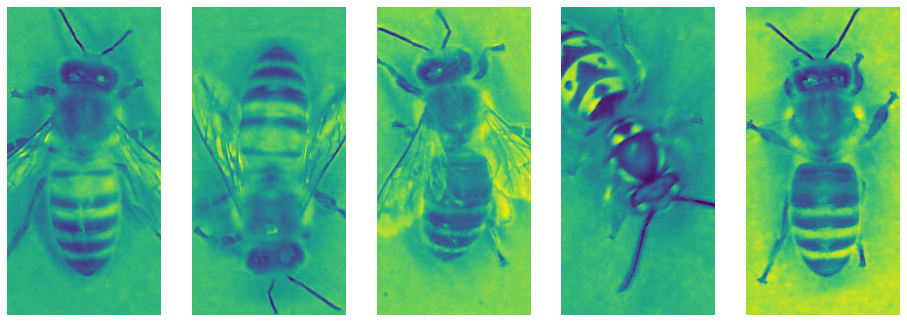

In [16]:
train_images_c = train_images[:,:,:,0]
validation_images_c = validation_images[:,:,:,0]
test_images_c = test_images[:,:,:,0]

showRepresentants(test_images_c)

Jak widzimy kolor zdjęć jest przekształcony do pojedynczego wymiaru. Czas sprawdzić jak na takich danych przebiega trening.

In [17]:
inputs = tf.keras.Input(shape=(300, 150, 1))
#Data augmentation
layer = layers.Rescaling(1./255.)(inputs)
layer = layers.RandomFlip("horizontal")(layer)
layer = layers.RandomRotation(0.1)(layer)
layer = layers.RandomZoom(0.2)(layer)

#Model architecture
layer = layers.Conv2D(filters=10, kernel_size=3, activation="relu")(layer)
layer = layers.Conv2D(filters=10, kernel_size=3, activation="relu")(layer)

layer = layers.MaxPooling2D(pool_size=2)(layer)

layer = layers.Conv2D(filters=10, kernel_size=3, activation="relu")(layer)
layer = layers.Conv2D(filters=10, kernel_size=3, activation="relu")(layer)

layer = layers.MaxPooling2D(pool_size=2)(layer)

layer = layers.Flatten()(layer)

layer = layers.Dropout(0.2)(layer)
outputs = layers.Dense(4, activation="sigmoid")(layer)
model_c = tf.keras.Model(inputs=inputs, outputs=outputs)


model_c.compile(loss=my_metric.loss,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[my_metric.all, my_metric.varroa, my_metric.pollen, my_metric.wasps, my_metric.cooling,])

In [19]:
history = model_c.fit(train_images_c, train_labels,
                        epochs=20,
                        batch_size = 32,
                        validation_data=(validation_images_c, validation_labels))

Epoch 1/20
180/180 [==============================] - 11s 50ms/step - loss: 0.3910 - all: 0.8544 - varroa: 0.8278 - pollen: 0.8656 - wasps: 0.8766 - cooling: 0.8477 - val_loss: 0.3436 - val_all: 0.8514 - val_varroa: 0.8271 - val_pollen: 0.8508 - val_wasps: 0.8758 - val_cooling: 0.8518
Epoch 2/20
180/180 [==============================] - 8s 46ms/step - loss: 0.3033 - all: 0.8725 - varroa: 0.8332 - pollen: 0.8656 - wasps: 0.9434 - cooling: 0.8477 - val_loss: 0.2602 - val_all: 0.8802 - val_varroa: 0.8271 - val_pollen: 0.8508 - val_wasps: 0.9834 - val_cooling: 0.8596
Epoch 3/20
180/180 [==============================] - 8s 46ms/step - loss: 0.2614 - all: 0.8789 - varroa: 0.8332 - pollen: 0.8602 - wasps: 0.9712 - cooling: 0.8512 - val_loss: 0.2233 - val_all: 0.8909 - val_varroa: 0.8271 - val_pollen: 0.8508 - val_wasps: 0.9863 - val_cooling: 0.8992
Epoch 4/20
180/180 [==============================] - 8s 46ms/step - loss: 0.2394 - all: 0.8858 - varroa: 0.8332 - pollen: 0.8602 - wasps: 0.975

In [20]:
model_c.evaluate(test_images_c, test_labels)

24/24 [==============================] - 0s 14ms/step - loss: 0.1658 - all: 0.9177 - varroa: 0.8392 - pollen: 0.8718 - wasps: 0.9987 - cooling: 0.9610


[0.16575081646442413,
 0.9176933169364929,
 0.8392427563667297,
 0.8717948794364929,
 0.9986979365348816,
 0.9610376358032227]

<a name="3.4"></a>
### Konkluzja 
-------------------

Test z nadmiernym dopasowaniem pokazał, że warstwa dropout'u w przypadku prostych do rozpoznania parametrów może zaszkodzić.

W przypadku próby z jednym kolorem zaobserwowaliśmy wzrost względem zwykłego modelu procentu poprawnie wykrywanych robotnic ochładzających ul.
Oznacza to, że nadmiar informacji może negatywnie wpłynąć na naukę modelu. 

Oba te eksperymenty wskazują na niedouczenie naszego podstawowego modelu.
Zobaczmy co się stanie jeśli pozwolimy mu działać jeszcze przez 20 epok.

In [21]:
history = model.fit(train_images, train_labels,
                        epochs=20,
                        batch_size = 32,
                        validation_data=(validation_images, validation_labels))

Epoch 1/20
180/180 [==============================] - 11s 59ms/step - loss: 0.1205 - all: 0.9303 - varroa: 0.8526 - pollen: 0.9144 - wasps: 0.9932 - cooling: 0.9609 - val_loss: 0.1069 - val_all: 0.9369 - val_varroa: 0.8525 - val_pollen: 0.9168 - val_wasps: 0.9945 - val_cooling: 0.9838
Epoch 2/20
180/180 [==============================] - 11s 58ms/step - loss: 0.1213 - all: 0.9299 - varroa: 0.8589 - pollen: 0.9099 - wasps: 0.9927 - cooling: 0.9582 - val_loss: 0.1024 - val_all: 0.9341 - val_varroa: 0.8727 - val_pollen: 0.9006 - val_wasps: 0.9980 - val_cooling: 0.9652
Epoch 3/20
180/180 [==============================] - 11s 59ms/step - loss: 0.1195 - all: 0.9311 - varroa: 0.8630 - pollen: 0.9125 - wasps: 0.9911 - cooling: 0.9578 - val_loss: 0.1045 - val_all: 0.9325 - val_varroa: 0.8584 - val_pollen: 0.8996 - val_wasps: 0.9961 - val_cooling: 0.9760
Epoch 4/20
180/180 [==============================] - 11s 60ms/step - loss: 0.1057 - all: 0.9383 - varroa: 0.8811 - pollen: 0.9158 - wasps: 0.

In [22]:
model.evaluate(test_images, test_labels)

24/24 [==============================] - 0s 15ms/step - loss: 0.0436 - all: 0.9728 - varroa: 0.9727 - pollen: 0.9343 - wasps: 1.0000 - cooling: 0.9844


[0.04357162117958069,
 0.9728315472602844,
 0.97265625,
 0.9342948794364929,
 1.0,
 0.984375]

Widać, że nasz model nadrobił braki w nauce względem tego wyposażonego w mniejszą ilość informacji. Co ciekawe, najbardziej poprawiło się wykrywanie dręczów pszczelich, dzięki czemu całościowa jakość klasyfikacji wzrosła do poziomu ponad 96%.

<a name="4"></a>
## Kontrybutorzy
-------------------

- Ania Suzdalcew
- Krzysztof Kilian
- Michał Balicki



Kontakt: meridor6919@wp.pl

<a name="5"></a>
## Źródła
-------------------

1. [Deep Learning with Python by François Chollet, version 6, 2017](https://www.manning.com/books/deep-learning-with-python)

2. [Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow by Aurélien Géron, 2nd edition, 2019](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

3. [TensorFlow Keras Documentation](https://www.tensorflow.org/api_docs/python/tf/keras)

4. [CNN Explainer](https://github.com/poloclub/cnn-explainer)

5. [Deep Learning cheatsheets for Stanford's CS 230](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-deep-learning-tips-and-tricks)

6. [Jaki jest związek pomiędzy sieciami CNN i głębokim uczeniem?](https://www.intel.pl/content/www/pl/pl/internet-of-things/computer-vision/convolutional-neural-networks.html)

7. Wykład "Uczenie maszynowe w Pythonie" dr Macieja Ślęczki

8. [Wikipedia](http://wikipedia.org)


<br/>

![zdjecie](https://drive.google.com/uc?id=16xYDkCsPLDC8VhVVwB5bq3rpxdC-fnYM)


<style type="text/css">
    ol { list-style-type: decimal; }
</style>